# Getting started with the Gemini API OpenAI compatibility

This example illustrates how to interact with the [Gemini API](https://ai.google.dev/gemini-api/docs) using the [OpenAI JS library](https://www.npmjs.com/package/openai).

This notebook will walk you through:

- Perform basic text generation using Gemini models via the OpenAI library
- Experiment with multimodal interactions, sending images on your prompts
- Extract information from text using structured outputs (ie. specific fields or JSON output)
- Use Gemini API tools, like function calling
- Generate embeddings using Gemini API models

More details about this OpenAI compatibility on the [documentation](https://ai.google.dev/gemini-api/docs/openai).


## Setup

### Install the Google GenAI SDK

Install the Google GenAI SDK from [npm](https://www.npmjs.com/package/@google/genai). 

```bash
$ npm install @google/genai
```

### Setup your API key

You can [create](https://aistudio.google.com/app/apikey) your API key using Google AI Studio with a single click.

Remember to treat your API key like a password. Don't accidentally save it in a notebook or source file you later commit to GitHub. In this notebook we will be storing the API key in a `.env` file. You can also set it as an environment variable or use a secret manager. 

Here's how to set it up in a `.env` file:

```bash
$ touch .env
$ echo "GEMINI_API_KEY=<YOUR_API_KEY>" >> .env
```

:::{.callout-tip}

Another option is to set the API key as an environment variable. You can do this in your terminal with the following command:

```bash
$ export GEMINI_API_KEY="<YOUR_API_KEY>"
```
:::

### Load the API key

To load the API key from the `.env` file, we will use the `dotenv` package. This package loads environment variables from a `.env` file into `process.env`. 

```bash
$ npm install dotenv
```

Then, we can load the API key in our code:


In [5]:
const dotenv = require("dotenv") as typeof import("dotenv");

dotenv.config({
  path: "../.env",
});

const GEMINI_API_KEY = process.env.GEMINI_API_KEY ?? "";
if (!GEMINI_API_KEY) {
  throw new Error("GEMINI_API_KEY is not set in the environment variables");
}
console.log("GEMINI_API_KEY is set in the environment variables");


GEMINI_API_KEY is set in the environment variables


:::{.callout-note}
In our particular case the `.env` is is one directory up from the notebook, hence we need to use `../` to go up one directory. If the `.env` file is in the same directory as the notebook, you can omit it altogether. 

```
│
├── .env
└── quickstarts
    └── Get_started_OpenAI_Compatibility.ipynb
```
:::


### Initialize SDK Client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.


In [6]:
const openai = require("openai") as typeof import("openai");

const ai = new openai.OpenAI({
  apiKey: GEMINI_API_KEY,
  baseURL: "https://generativelanguage.googleapis.com/v1beta/openai/",
});


## Define the Gemini model to be used

You can start by listing the available models using the OpenAI library.


In [6]:
let models = await ai.models.list();
let hasNextPage = true;
while (hasNextPage) {
  for (const model of models.data) {
    console.log(`Model ID: ${model.id}`);
  }
  hasNextPage = models.hasNextPage();
  if (hasNextPage) {
    models = await models.getNextPage();
  }
}


Model ID: models/embedding-gecko-001
Model ID: models/gemini-1.0-pro-vision-latest
Model ID: models/gemini-pro-vision
Model ID: models/gemini-1.5-pro-latest
Model ID: models/gemini-1.5-pro-002
Model ID: models/gemini-1.5-pro
Model ID: models/gemini-1.5-flash-latest
Model ID: models/gemini-1.5-flash
Model ID: models/gemini-1.5-flash-002
Model ID: models/gemini-1.5-flash-8b
Model ID: models/gemini-1.5-flash-8b-001
Model ID: models/gemini-1.5-flash-8b-latest
Model ID: models/gemini-2.5-pro-preview-03-25
Model ID: models/gemini-2.5-flash-preview-04-17
Model ID: models/gemini-2.5-flash-preview-05-20
Model ID: models/gemini-2.5-flash
Model ID: models/gemini-2.5-flash-preview-04-17-thinking
Model ID: models/gemini-2.5-flash-lite-preview-06-17
Model ID: models/gemini-2.5-pro-preview-05-06
Model ID: models/gemini-2.5-pro-preview-06-05
Model ID: models/gemini-2.5-pro
Model ID: models/gemini-2.0-flash-exp
Model ID: models/gemini-2.0-flash
Model ID: models/gemini-2.0-flash-001
Model ID: models/gem

## Define the Gemini model to be used

In this example, you will use the `gemini-2.5-flash-preview-05-20` model. For more details about the available models, check the [Gemini models](https://ai.google.dev/gemini-api/docs/models/gemini) page from the Gemini API documentation.


In [7]:
const tslab = require("tslab") as typeof import("tslab");

const MODEL_ID = "gemini-2.5-flash-preview-05-20";


## Initial interaction - generate text

For your first request, use the OpenAI SDK to perform text generation with a text prompt.


In [13]:
const textResponse = await ai.chat.completions.create({
  model: MODEL_ID,
  messages: [
    { role: "system", content: "You are a helpful assistant." },
    { role: "user", content: "What is generative AI?" },
  ],
});
tslab.display.markdown(textResponse.choices[0].message.content ?? "");


**Generative AI** is a type of artificial intelligence that can **create new, original content**, rather than just analyzing or classifying existing data. Unlike traditional AI that might recognize patterns or make predictions based on input (like classifying an image as a "cat"), generative AI can *produce* a brand-new image of a cat that has never existed before, write an original story, compose music, or even generate functional code.

Think of it as an AI that has become a "creator" rather than just an "analyzer" or "decider."

---

### How Does it Work (Simply)?

1.  **Massive Training Data:** Generative AI models are trained on enormous datasets of existing content (e.g., millions of images, billions of text documents, hours of audio).
2.  **Learning Patterns and Structures:** During training, the AI doesn't just memorize the data; it learns the underlying patterns, relationships, styles, and structures within that data. For example, it learns what makes a sentence grammatically correct, what common objects look like in various settings, or how musical notes combine harmonically.
3.  **Generating New Content:** Once trained, when given a "prompt" (a text description, an image, or a piece of audio as a starting point), the AI uses its learned understanding to generate something entirely new that aligns with the prompt and the patterns it has observed. It essentially "imagines" new content based on its extensive knowledge.

---

### What Can Generative AI Create? (Examples)

Generative AI is behind many of the impressive breakthroughs we've seen recently:

*   **Text:**
    *   **Large Language Models (LLMs)** like OpenAI's ChatGPT, Google's Gemini, or Anthropic's Claude can write articles, stories, poems, emails, summaries, code, answer questions, translate languages, and engage in conversations.
*   **Images:**
    *   Tools like DALL-E, Midjourney, and Stable Diffusion can generate realistic images or artistic illustrations from a text description (e.g., "a futuristic city at sunset with flying cars"). They can also modify existing images or create variations.
*   **Audio:**
    *   Generate realistic speech from text (Text-to-Speech), create original music compositions in various styles, or even clone voices.
*   **Video:**
    *   Create short video clips, animate still images, or even generate deepfakes (which raise significant ethical concerns).
*   **Code:**
    *   Generate programming code snippets, complete functions, or even entire software applications based on natural language descriptions.
*   **3D Models:**
    *   Generate 3D objects, textures, and environments for games, simulations, or design.

---

### Why is it a Big Deal?

*   **Democratization of Creativity:** It lowers the barrier for individuals to create high-quality content without needing specialized artistic or technical skills.
*   **Enhanced Productivity:** Automates content creation tasks, saving time and resources for businesses and individuals.
*   **Innovation:** Opens up entirely new possibilities for design, entertainment, education, and many other fields.
*   **Personalization:** Can generate highly personalized content tailored to individual preferences.

---

### Challenges and Ethical Considerations:

While powerful, generative AI also presents challenges:

*   **Bias:** It can perpetuate or amplify biases present in its training data.
*   **Misinformation and Deepfakes:** The ability to generate realistic fake content (text, images, audio, video) raises concerns about the spread of misinformation and manipulation.
*   **Copyright and Ownership:** Who owns the content generated by AI? Does it infringe on the copyright of the data it was trained on?
*   **Job Displacement:** Potential impact on creative industries and jobs.
*   **Environmental Impact:** Training these massive models requires significant computational power and energy.
*   **Hallucinations:** LLMs, in particular, can sometimes generate factually incorrect information that sounds plausible.

In summary, generative AI is a revolutionary leap in artificial intelligence, moving from analysis to creation, and fundamentally changing how we interact with and produce digital content.

## Generating code

You can work with the Gemini API to generate code for you.


In [14]:
const CODE_PROMPT = `
    Write a C program that takes two IP addresses, representing the start and end of a range
    (e.g., 192.168.1.1 and 192.168.1.254), as input arguments. The program should convert this
    IP address range into the minimal set of CIDR notations that completely cover the given
    range. The output should be a comma-separated list of CIDR blocks.
`;

const codeResponse = await ai.chat.completions.create({
  model: MODEL_ID,
  messages: [{ role: "user", content: CODE_PROMPT }],
});
tslab.display.markdown(codeResponse.choices[0].message.content ?? "");


This C program takes two IP addresses (start and end of a range) as command-line arguments. It then calculates and prints the minimal set of CIDR notations that completely cover the given IP address range.

The algorithm works by iteratively finding the largest possible CIDR block that starts at the current IP address and fits entirely within the remaining part of the specified range.

**Key Concepts:**

*   **IP Addresses as Integers:** IP addresses are treated as 32-bit unsigned integers. This allows for easy arithmetic operations.
*   **Network Byte Order vs. Host Byte Order:** IP addresses are typically stored in network byte order. For arithmetic, they need to be converted to host byte order using `ntohl()` and back to network byte order for `inet_ntoa()` using `htonl()`.
*   **CIDR Block Properties:**
    *   A `/N` CIDR block covers `2^(32-N)` IP addresses.
    *   The starting address of a CIDR block must be "aligned" with its block size. For example, a `/24` block (size 256) must start at an address where the last octet is `0`. This means `start_ip % block_size == 0`, or bitwise `(start_ip & (block_size - 1)) == 0`.
*   **Greedy Approach:** The program works by repeatedly finding the largest possible CIDR block that begins at the current `start_ip` and does not exceed the `end_ip` of the original range. This ensures a minimal set.

---

```c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <arpa/inet.h> // For inet_addr, inet_ntoa, ntohl, htonl
#include <stdint.h>    // For uint32_t, uint64_t
#include <stdbool.h>   // For bool type
#include <limits.h>    // For UINT32_MAX

// Function to convert an IP string to a host byte order uint32_t
static uint32_t ip_string_to_uint32(const char *ip_str) {
    struct in_addr sa;
    if (inet_pton(AF_INET, ip_str, &(sa)) != 1) {
        fprintf(stderr, "Error: Invalid IP address format: %s\n", ip_str);
        exit(EXIT_FAILURE);
    }
    return ntohl(sa.s_addr);
}

// Function to convert a host byte order uint32_t to an IP string
// Note: inet_ntoa uses a static buffer, so the return value is valid
// only until the next call. For simple printing, it's fine.
static const char* uint32_to_ip_string(uint32_t ip_val) {
    struct in_addr sa;
    sa.s_addr = htonl(ip_val);
    return inet_ntoa(sa);
}

int main(int argc, char *argv[]) {
    if (argc != 3) {
        fprintf(stderr, "Usage: %s <start_ip> <end_ip>\n", argv[0]);
        fprintf(stderr, "Example: %s 192.168.1.1 192.168.1.254\n", argv[0]);
        return EXIT_FAILURE;
    }

    uint32_t start_ip_val = ip_string_to_uint32(argv[1]);
    uint32_t end_ip_val = ip_string_to_uint32(argv[2]);

    if (start_ip_val > end_ip_val) {
        fprintf(stderr, "Error: Start IP (%s) cannot be greater than End IP (%s).\n", argv[1], argv[2]);
        return EXIT_FAILURE;
    }

    uint32_t current_ip = start_ip_val;
    bool first_cidr = true;

    while (current_ip <= end_ip_val) {
        int best_prefix_len = -1;
        
        // Iterate from the smallest block (longest prefix /32) to largest block (shortest prefix /0)
        // We are looking for the largest possible block that fits.
        // So we iterate prefix_len from 32 down to 0. The first one we find is the largest.
        for (int prefix_len = 32; prefix_len >= 0; prefix_len--) {
            // Calculate the size of the block for this prefix length.
            // Use uint64_t for block_size to avoid overflow when prefix_len is 0 (2^32)
            uint64_t block_size = 1ULL << (32 - prefix_len);

            // 1. Check if the current_ip is aligned for this prefix_len.
            // For a block to start at current_ip with a /prefix_len, current_ip must be a multiple of block_size.
            // This is equivalent to (current_ip & (block_size - 1)) == 0.
            // This bitwise check works correctly even for prefix_len 0 (block_size 2^32),
            // as (2^32 - 1) is 0xFFFFFFFF, so (current_ip & 0xFFFFFFFF) == 0 becomes current_ip == 0.
            if ((current_ip & (block_size - 1)) != 0) {
                continue; // Not aligned for this block size
            }

            // 2. Check if this potential block fits within the remaining target range.
            // The last IP in this potential block is current_ip + block_size - 1.
            // We need: (current_ip + block_size - 1) <= end_ip_val.
            // To prevent overflow when calculating (current_ip + block_size - 1):
            // Check if (block_size - 1) is too large for current_ip + (block_size - 1) to fit in uint32_t.
            // This check (current_ip > UINT32_MAX - (block_size - 1)) is crucial.
            if (block_size - 1 > UINT32_MAX - current_ip) { // check if current_ip + block_size - 1 would overflow
                // If it would overflow, it definitely extends beyond end_ip_val (unless end_ip_val is also near UINT32_MAX)
                // In such a case, this block can't be fully contained if max_ip is UINT32_MAX.
                // It means the block extends beyond the maximum representable IP address.
                // So, it cannot be contained within end_ip_val unless end_ip_val is UINT32_MAX
                // AND the block starts at 0. A simpler check might be just
                // if (current_ip + block_size -1 > end_ip_val)
                // but that can overflow.

                // Safer check: Does `current_ip + (block_size - 1)` extend beyond `end_ip_val`?
                // This is equivalent to `block_size - 1 > end_ip_val - current_ip`.
                // Use uint64_t to prevent overflow for `end_ip_val - current_ip`
                if (block_size > (uint64_t)end_ip_val - current_ip + 1) { // block_size is too large for the remaining range
                    continue;
                }
            } else {
                // Now we can safely calculate block_end as a uint32_t
                uint32_t block_end = current_ip + (uint32_t)(block_size - 1);
                if (block_end > end_ip_val) {
                    continue; // Block extends beyond the end of our target range
                }
            }

            // If we reached here, this prefix_len represents a valid block that
            // starts at current_ip and fits within the remaining range.
            // Since we iterate prefix_len downwards, this is the largest such block.
            best_prefix_len = prefix_len;
            break; // Found the largest block, so break the inner loop
        }

        if (best_prefix_len == -1) {
            // This should ideally not happen if current_ip <= end_ip_val,
            // as a /32 block should always be possible.
            fprintf(stderr, "Internal Error: Could not find a suitable CIDR block for IP %s\n", uint32_to_ip_string(current_ip));
            return EXIT_FAILURE;
        }

        // Print the found CIDR block
        if (!first_cidr) {
            printf(",");
        }
        printf("%s/%d", uint32_to_ip_string(current_ip), best_prefix_len);
        first_cidr = false;

        // Advance current_ip to the IP address immediately after the processed block
        uint64_t processed_block_size = 1ULL << (32 - best_prefix_len);
        if (current_ip > UINT32_MAX - processed_block_size) {
            // This means advancing current_ip would cause an overflow,
            // implying we've covered addresses up to UINT32_MAX.
            break; 
        }
        current_ip += (uint32_t)processed_block_size;
    }
    printf("\n");

    return EXIT_SUCCESS;
}
```

---

**How to Compile and Run:**

1.  **Save:** Save the code as `ip_range_to_cidr.c` (or any other `.c` extension).
2.  **Compile:** Use a C compiler like GCC:
    ```bash
    gcc ip_range_to_cidr.c -o ip_range_to_cidr
    ```
    (You might need to include `-Wall -Wextra -std=c11` for better warnings and C11 standard compliance, though not strictly necessary for this code to compile.)
3.  **Run:**
    ```bash
    ./ip_range_to_cidr 192.168.1.1 192.168.1.254
    ```

**Example Outputs:**

*   **Input:** `192.168.1.1 192.168.1.254`

    **Output:** `192.168.1.1/32,192.168.1.2/31,192.168.1.4/30,192.168.1.8/29,192.168.1.16/28,192.168.1.32/27,192.168.1.64/26,192.168.1.128/25,192.168.1.252/30,192.168.1.254/31`
    *(This output demonstrates the greedy algorithm finding larger blocks where possible, then breaking down remaining parts into smaller blocks. It covers 192.168.1.1 to 192.168.1.255, excluding 192.168.1.255 which is not included in the range)*

*   **Input:** `192.168.1.0 192.168.1.255`

    **Output:** `192.168.1.0/24`

*   **Input:** `10.0.0.0 10.255.255.255`

    **Output:** `10.0.0.0/8`

*   **Input:** `192.168.0.1 192.168.0.1`

    **Output:** `192.168.0.1/32`

*   **Input:** `0.0.0.0 255.255.255.255`

    **Output:** `0.0.0.0/0`

**Important Notes:**

*   `inet_ntoa()` is considered deprecated and not thread-safe because it uses a static internal buffer. For more robust applications, `inet_ntop()` should be used, which requires providing a buffer. For this simple command-line utility, it's generally acceptable.
*   The use of `uint64_t` for `block_size` and intermediate calculations involving large IP address ranges (especially for `/0` which represents 2^32 addresses) is crucial to prevent integer overflow.
*   Error handling for invalid IP addresses and range order is included.

## Multimodal interactions

Gemini models are able to process different data modatilities, such as unstructured files, images, audio and videos, allowing you to experiment with multimodal scenarios where you can ask the model to describe, explain, get insights or extract information out of those multimedia information included into your prompts. In this section you will work across different senarios with multimedia information.

:::{.callout-important}

The OpenAI SDK compatibility only supports inline images and audio files. For videos support, use the [Gemini API's JS SDK](https://github.com/googleapis/js-genai).

:::


### Working with images (a single image)

You will first download the image you want to work with.


In [4]:
const fs = require("fs") as typeof import("fs");
const path = require("path") as typeof import("path");

const downloadFile = async (url: string, filePath: string) => {
  const response = await fetch(url);
  if (!response.ok) {
    throw new Error(`Failed to download file: ${response.statusText}`);
  }
  fs.mkdirSync(path.dirname(filePath), { recursive: true });
  const buffer = await response.blob();
  const bufferData = Buffer.from(await buffer.arrayBuffer());
  fs.writeFileSync(filePath, bufferData);
};


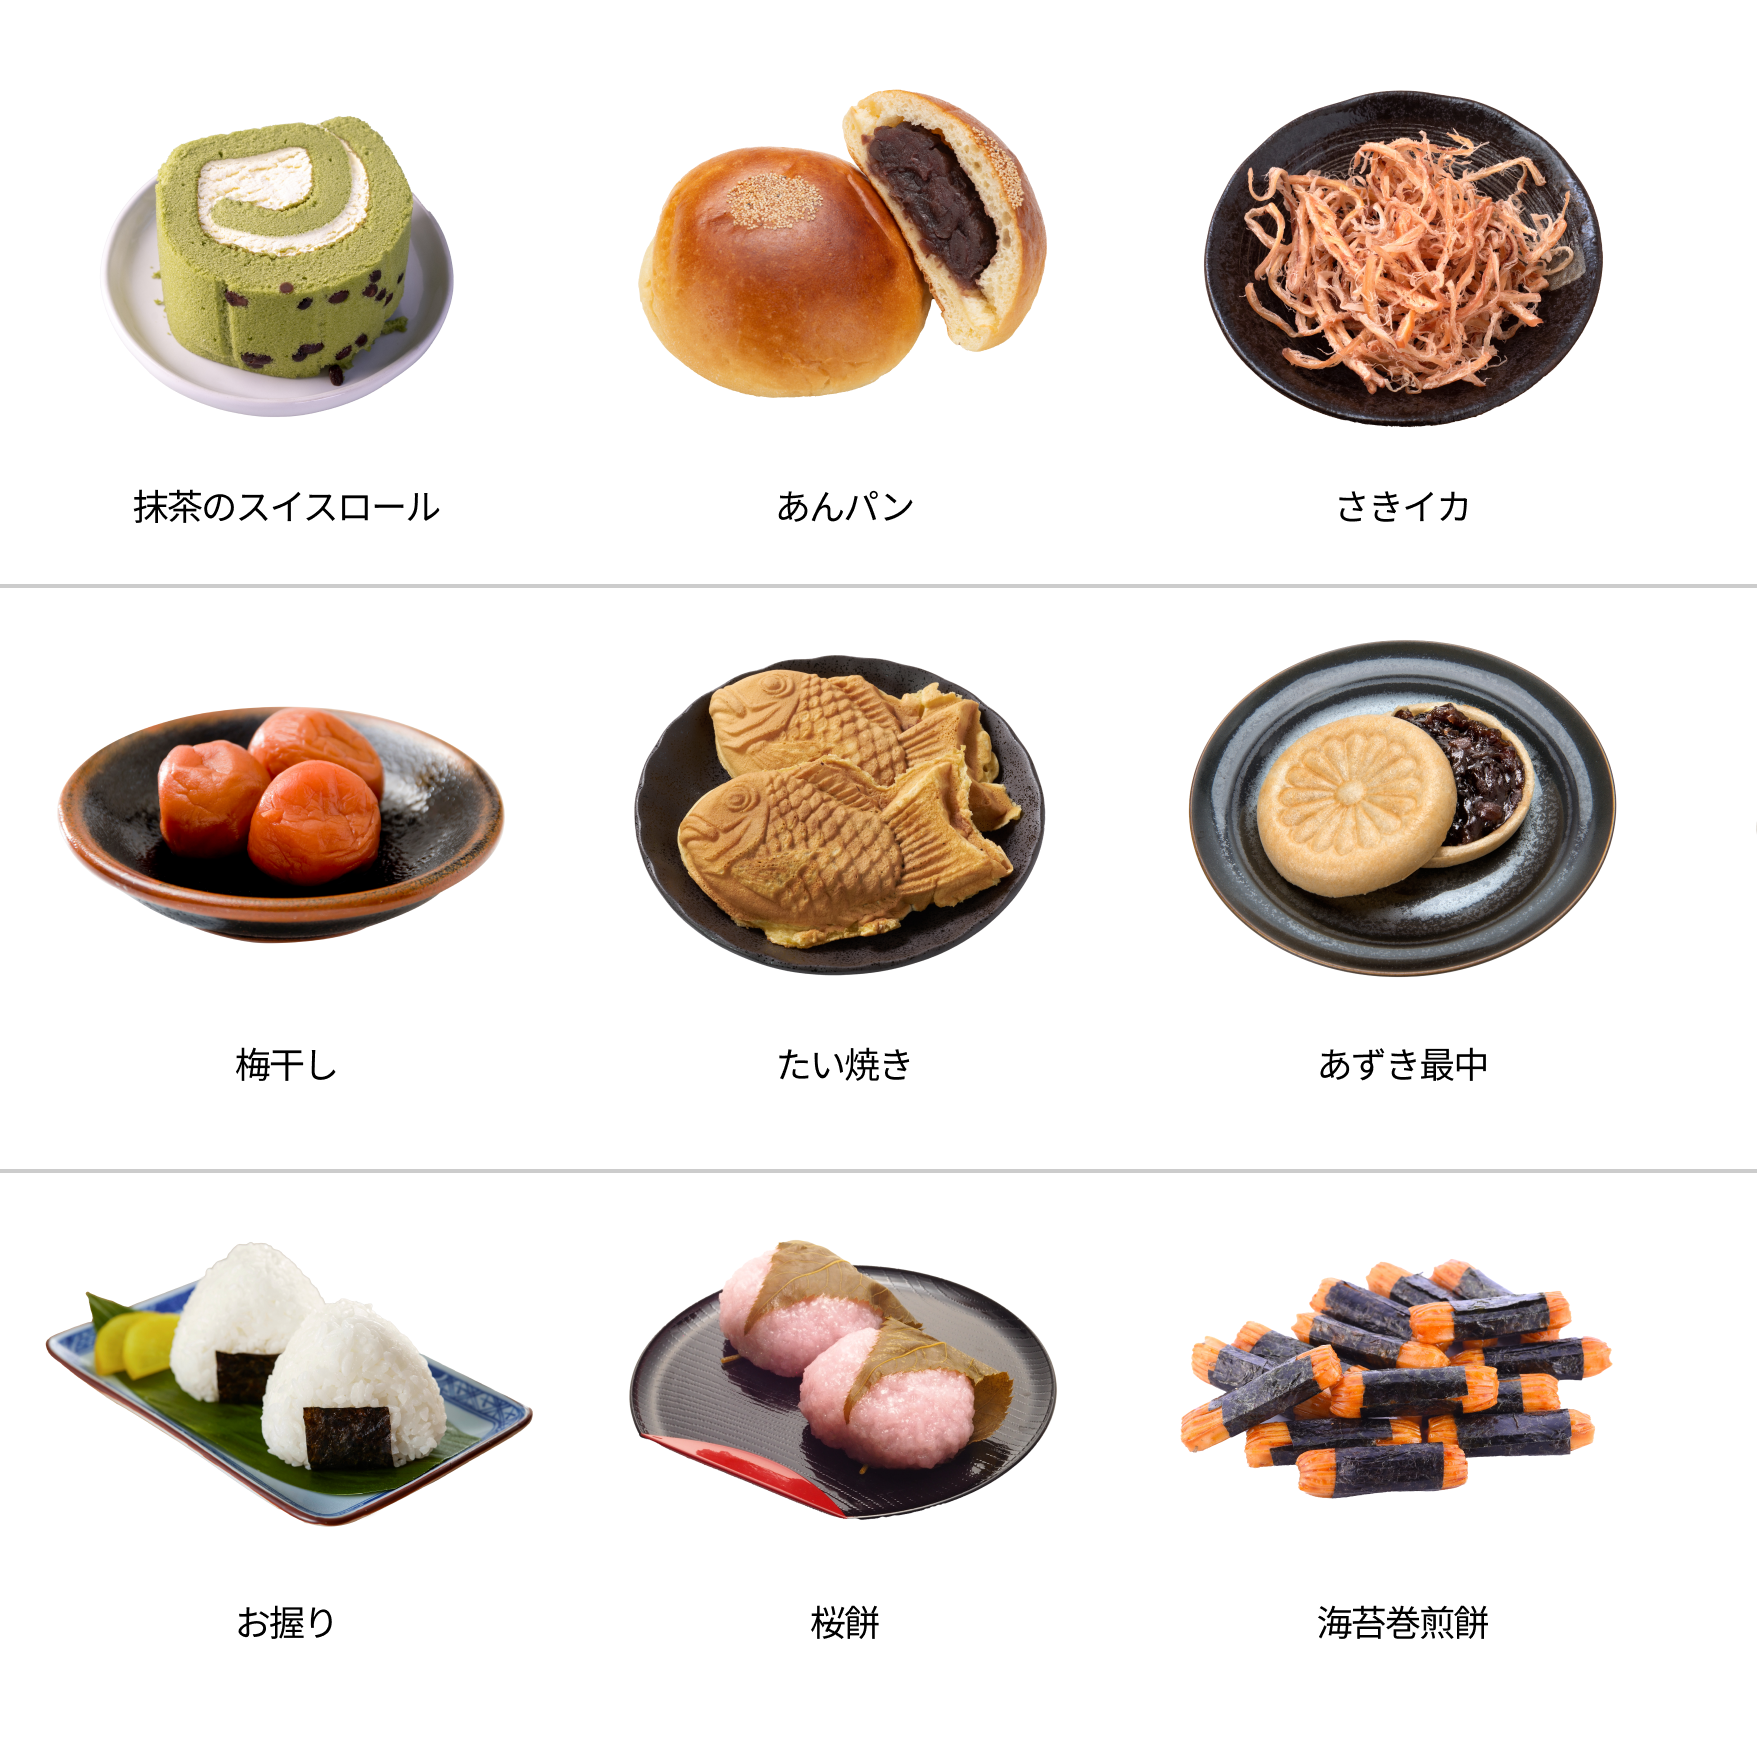

In [18]:
const IMAGE_URL = "https://storage.googleapis.com/generativeai-downloads/images/Japanese_Bento.png";

const imageFilePath = path.join("../assets/openai_compatibility", "Japanese_Bento.png");
await downloadFile(IMAGE_URL, imageFilePath);

tslab.display.png(fs.readFileSync(imageFilePath));


Now you can encode the image and work with the OpenAI library to interact with the Gemini models.


In [19]:
const base64Image = fs.readFileSync(imageFilePath).toString("base64");

const imageResponse = await ai.chat.completions.create({
  model: MODEL_ID,
  messages: [
    {
      role: "user",
      content: [
        {
          type: "text",
          text: "Describe the items on this image. If there is any non-English text, translate it as well",
        },
        {
          type: "image_url",
          image_url: {
            url: `data:image/png;base64,${base64Image}`,
          },
        },
      ],
    },
  ],
});
tslab.display.markdown(imageResponse.choices[0].message.content ?? "");


Here are the descriptions of the items on the image, with translations of the Japanese text:

**Row 1 (Top Row):**

1.  **Item 1 (Left): Matcha Swiss Roll**
    *   **Description:** A slice of green tea (matcha) Swiss roll cake. It features a vibrant green cake layer rolled around a swirl of white cream, and appears to have small dark bits (possibly red beans or chocolate) embedded in the cake. It's served on a small white plate.
    *   **Japanese Text:** 抹茶のスイスロール (Matcha no Suisu Rōru)
    *   **Translation:** Matcha Swiss Roll

2.  **Item 2 (Middle): Anpan**
    *   **Description:** Two anpan, which are sweet bread rolls filled with red bean paste. One bun is whole and sprinkled with seeds (likely sesame or poppy), while the other is cut open to reveal the dark, rich adzuki (red bean) paste filling inside.
    *   **Japanese Text:** あんパン (Anpan)
    *   **Translation:** Anpan (Sweet Red Bean Bun)

3.  **Item 3 (Right): Saki Ika**
    *   **Description:** A pile of saki ika, which is shredded and dried seasoned squid, a popular snack in Japan. The strips are light reddish-orange and have a slightly translucent appearance. It's presented on a dark, textured plate.
    *   **Japanese Text:** さきイカ (Saki Ika)
    *   **Translation:** Shredded Dried Squid

**Row 2 (Middle Row):**

4.  **Item 4 (Left): Umeboshi**
    *   **Description:** A small serving of umeboshi, which are intensely sour and salty pickled Japanese plums. There are several round, wrinkly, reddish-orange plums in a small, dark bowl.
    *   **Japanese Text:** 梅干し (Umeboshi)
    *   **Translation:** Pickled Plums

5.  **Item 5 (Middle): Taiyaki**
    *   **Description:** Two taiyaki, which are fish-shaped cakes typically filled with red bean paste. They have a golden-brown, waffle-like texture and are molded into the shape of a sea bream. They are served on a dark plate.
    *   **Japanese Text:** たい焼き (Taiyaki)
    *   **Translation:** Taiyaki (Fish-shaped cake)

6.  **Item 6 (Right): Azuki Monaka**
    *   **Description:** A monaka, a traditional Japanese sweet consisting of adzuki (red bean) paste sandwiched between two thin, crisp wafers. One of the wafers has an intricate, patterned design, and the sweet is shown with the top wafer removed to reveal the dark, chunky red bean paste filling. It's on a dark plate.
    *   **Japanese Text:** あずき最中 (Azuki Monaka)
    *   **Translation:** Azuki (Red Bean) Monaka

**Row 3 (Bottom Row):**

7.  **Item 7 (Left): Onigiri**
    *   **Description:** Two onigiri, or Japanese rice balls, shaped into triangles. Each is partially wrapped with a strip of dark green nori (seaweed). They are served on a blue and white patterned plate, accompanied by a few slices of yellow pickled vegetables (likely takuan, pickled daikon radish).
    *   **Japanese Text:** お握り (Onigiri)
    *   **Translation:** Rice Ball

8.  **Item 8 (Middle): Sakuramochi**
    *   **Description:** Two sakuramochi, which are traditional Japanese sweets made from pink-colored mochi (rice cake) and typically filled with red bean paste. Each is wrapped in a pickled cherry blossom (sakura) leaf. They are presented on a black and red lacquerware plate.
    *   **Japanese Text:** 桜餅 (Sakuramochi)
    *   **Translation:** Cherry Blossom Mochi

9.  **Item 9 (Right): Nori Maki Senbei**
    *   **Description:** A pile of nori maki senbei, which are Japanese rice crackers. These are small, cylindrical, orange-colored crackers, each individually wrapped with a strip of dark green nori seaweed.
    *   **Japanese Text:** 海苔巻き煎餅 (Nori Maki Senbei)
    *   **Translation:** Nori-Wrapped Rice Crackers

### Working with images (multiple images)

You can do the same process while sending multiple images into the same prompt.


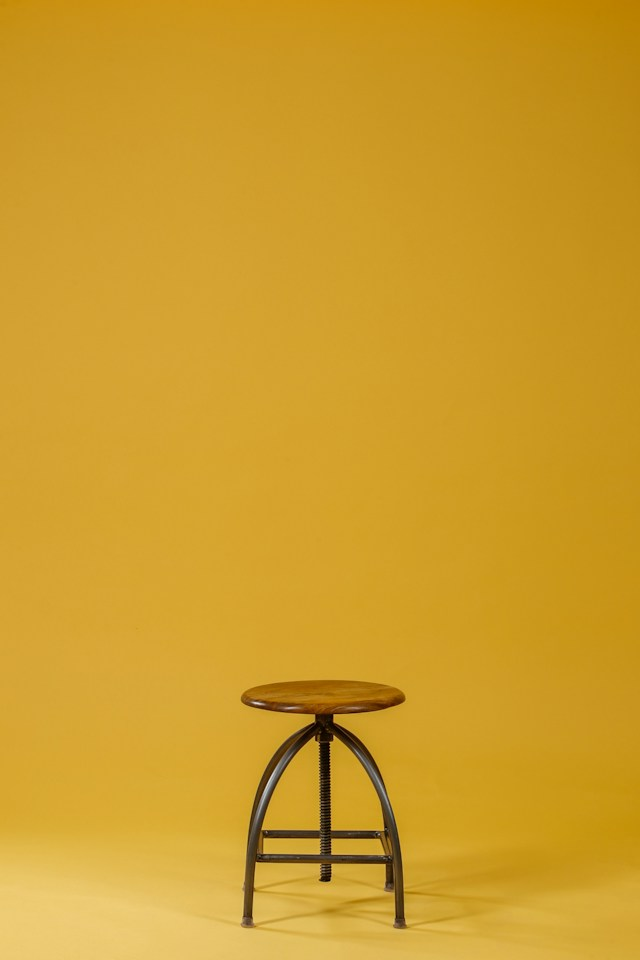

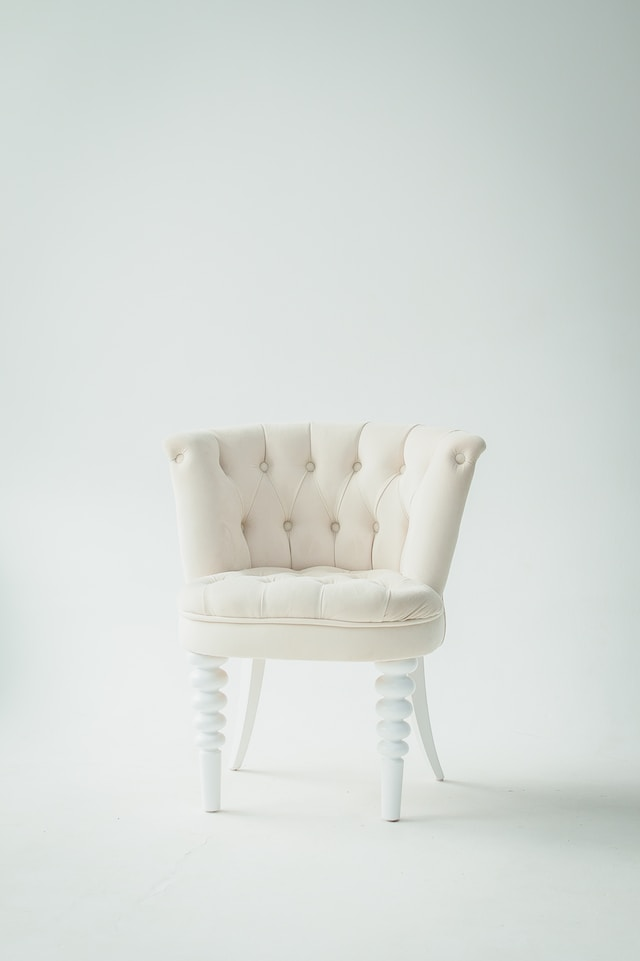

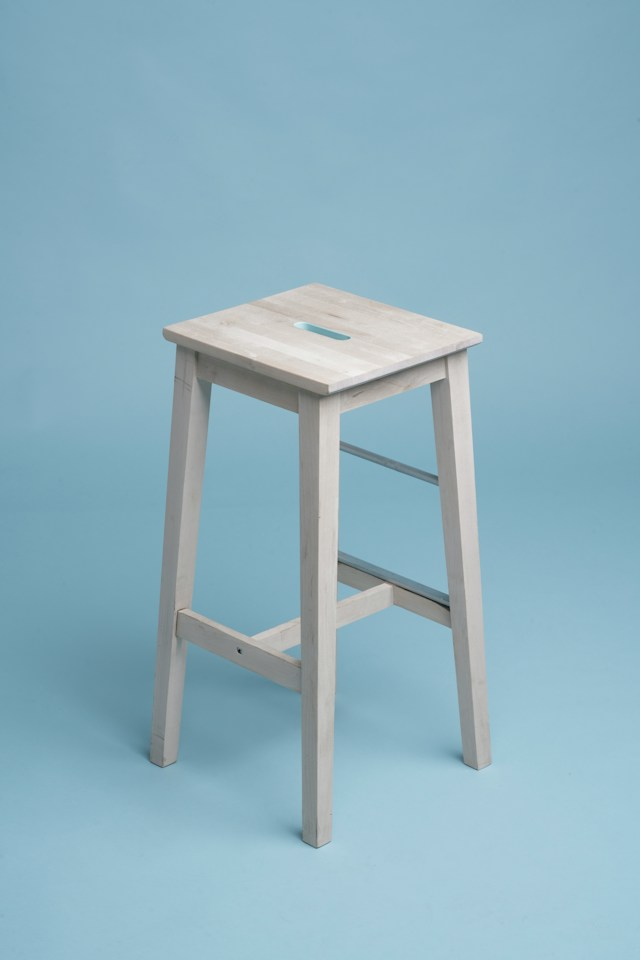

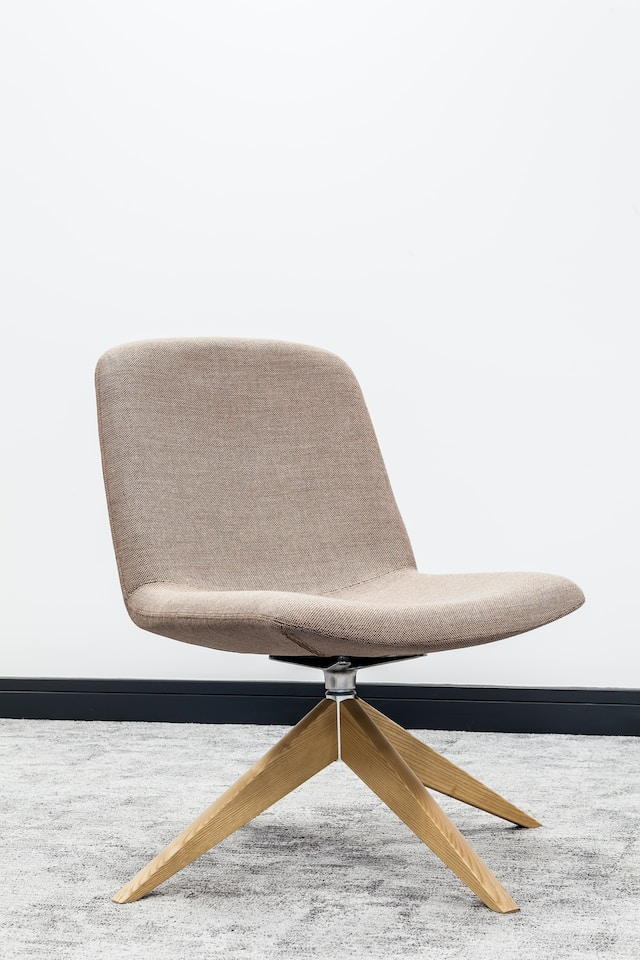

In [20]:
const IMAGE_URLS = [
  "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/cesar-couto-OB2F6CsMva8-unsplash.jpg",
  "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/daniil-silantev-1P6AnKDw6S8-unsplash.jpg",
  "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/ruslan-bardash-4kTbAMRAHtQ-unsplash.jpg",
  "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/scopic-ltd-NLlWwR4d3qU-unsplash.jpg",
];
const imageFilePaths = IMAGE_URLS.map((url, index) => {
  const fileName = `furniture_${index + 1}.jpg`;
  return path.join("../assets/openai_compatibility", fileName);
});

await Promise.all(IMAGE_URLS.map((url, index) => downloadFile(url, imageFilePaths[index])));
imageFilePaths.forEach((filePath) => {
  tslab.display.jpeg(fs.readFileSync(filePath));
});


Now you can encode the images and send them with your prompt.


In [21]:
import OpenAI from "openai";

const imageBase64s = imageFilePaths.map((filePath) => fs.readFileSync(filePath).toString("base64"));

const multiImageResponse = await ai.chat.completions.create({
  model: MODEL_ID,
  messages: [
    {
      role: "user",
      content: [
        {
          type: "text",
          text: "Describe for what type of living room each of those items are the best match",
        },
        ...imageBase64s.map(
          (base64) =>
            ({
              type: "image_url",
              image_url: {
                url: `data:image/jpeg;base64,${base64}`,
              },
            }) as OpenAI.ChatCompletionContentPartImage
        ),
      ],
    },
  ],
});
tslab.display.markdown(multiImageResponse.choices[0].message.content ?? "");


Here's a description of the type of living room each item would best match, based on its design and aesthetic:

---

**1. Industrial Adjustable Stool (Image 1)**

*   **Description:** This stool features a warm, finished wooden seat and a dark, possibly metal, base with an exposed screw mechanism for height adjustment. Its design is sturdy, utilitarian, and has a raw, functional appeal.
*   **Best Match Living Room:** This stool is an excellent fit for **Industrial, Loft, Urban Chic, or Rustic/Farmhouse** living rooms. Its combination of natural wood and dark metal, along with the visible mechanism, aligns perfectly with the exposed brick, concrete, reclaimed wood, and metallic accents often found in industrial designs. It can serve as an extra seat, a unique side table for a drink, or a display stand for a plant or sculpture, adding an authentic, edgy touch.

---

**2. Tufted Upholstered Armchair (Image 2)**

*   **Description:** This armchair is upholstered in a light, possibly cream or off-white fabric, featuring deep button tufting on the back and arms, rolled armrests, and decorative turned legs. It exudes a sense of elegance, comfort, and classic charm.
*   **Best Match Living Room:** This chair is ideal for **Traditional, Glam, Shabby Chic, French Country, or Neoclassical** living rooms. Its ornate details, plush upholstery, and classic silhouette speak to a desire for comfort and sophisticated aesthetics. It would complement spaces with intricate mouldings, crystal chandeliers, antique furniture, soft drapery, and a luxurious, inviting atmosphere. It functions beautifully as a statement accent chair or part of a formal seating arrangement.

---

**3. Simple Wooden Bar/Counter Stool (Image 3)**

*   **Description:** This is a tall, simple wooden stool with a square top and straight legs, likely made of light or whitewashed wood. Its design is minimalist, clean-lined, and highly functional without any superfluous decoration.
*   **Best Match Living Room:** This stool is perfectly suited for **Scandinavian, Modern, Minimalist, Contemporary, or Casual Coastal** living rooms. Its light wood tone and uncomplicated form align with the Scandinavian emphasis on natural materials, functionality, and bright, airy spaces. In a modern or minimalist setting, it offers practical extra seating or a surface without cluttering the visual space. It could also fit well in an open-concept living room that incorporates a kitchen island or counter, serving as breakfast bar seating.

---

**4. Modern Lounge Chair with Sculptural Base (Image 4)**

*   **Description:** This low-slung lounge chair features a subtly curved, upholstered seat and back in a neutral fabric (like beige or light grey), supported by a distinctive, sculptural wooden base that appears to have a star-like or splayed design, possibly allowing for a swivel. Its design is sleek, sophisticated, and contemporary.
*   **Best Match Living Room:** This chair is an excellent match for **Modern, Mid-Century Modern, Contemporary, or Scandinavian** living rooms. Its clean lines, organic curves, and striking yet understated base are hallmarks of these design movements. It's a statement piece that prioritizes both comfort and aesthetic appeal. It would fit well in spaces with minimalist decor, natural textures, geometric patterns, and other iconic modern furniture, serving as a comfortable reading nook chair or a chic accent piece for conversation.

### Working with audio files

You can also send audio files on your prompt. Audio data provides a more rich input than text alone, and can be use for tasks like transcription, or as direct prompting like a voice assistant.

First you need to download the audio you want to use.


In [24]:
const AUDIO_URL = "https://storage.googleapis.com/generativeai-downloads/data/Apollo-11_Day-01-Highlights-10s.mp3";

const audioFilePath = path.join("../assets/openai_compatibility", "Apollo-11_Day-01-Highlights-10s.mp3");
await downloadFile(AUDIO_URL, audioFilePath);

tslab.display.html(
  `<audio controls><source src="${audioFilePath}" type="audio/mpeg">Your browser does not support the audio element.</audio>`
);


Your browser does not support the audio element.

In [25]:
const audioBase64 = fs.readFileSync(audioFilePath).toString("base64");

const audioResponse = await ai.chat.completions.create({
  model: MODEL_ID,
  messages: [
    {
      role: "user",
      content: [
        {
          type: "text",
          text: "Transcribe this audio file. After transcribing, tell me from what this can be related to.",
        },
        {
          type: "input_audio",
          input_audio: {
            data: audioBase64,
            format: "mp3",
          },
        },
      ],
    },
  ],
});
tslab.display.markdown(audioResponse.choices[0].message.content ?? "");


Here is the transcription of the audio file:

"minus 10, nine, eight. We have a go for main engine start. We have main engine start."

---

**What this can be related to:**

This audio can be directly related to a **rocket launch or a space mission countdown**.

The terminology "minus 10, nine, eight," followed by "go for main engine start," and "main engine start" are classic phrases used in the procedures leading up to and initiating the launch of a rocket or spacecraft.

## Structured outputs

Gemini API allows you to format the way your response you be generated via [structured outputs](https://ai.google.dev/gemini-api/docs/structured-output). You can define the structure you want to be used as a defined schema and, using the OpenAI library, you send this structure as the `response_format` parameter.

In this example you will:

- download a scientific paper
- extract its information
- define the structure you want your response in
- send your request using the `response_format` parameter

First you need to download the reference paper. You will use the [Attention is all your need](https://arxiv.org/pdf/1706.03762.pdf) Google paper that introduced the [Transformers architecture](https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture)).


In [6]:
const PAPER_URL = "https://arxiv.org/pdf/1706.03762.pdf";
const paperFilePath = path.join("../assets/openai_compatibility", "Attention_is_All_You_Need.pdf");
await downloadFile(PAPER_URL, paperFilePath);


Look at one of the pages:


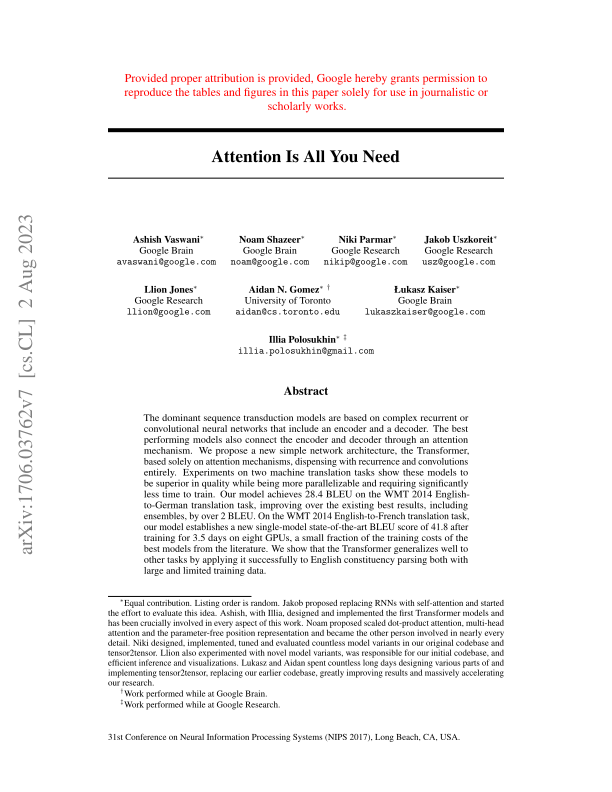

In [27]:
const getPage = async (pdfPath: string, pageNumber: number): Promise<Uint8Array> => {
  const { pdf } = await import("pdf-to-img");
  const document = await pdf(pdfPath);
  let pageIndex = 0;
  for await (const page of document) {
    if (pageIndex === pageNumber) {
      return new Uint8Array(page);
    }
    pageIndex++;
  }
  throw new Error(`Page ${pageNumber} not found in the PDF document.`);
};

tslab.display.png(await getPage(paperFilePath, 0));


Now let us extract the text from the PDF file. You can use the [pdf-parse](https://www.npmjs.com/package/pdf-parse) package to extract the text from the PDF file. 


In [16]:
const pdf_parse = require("pdf-parse") as typeof import("pdf-parse");

const pdfData = fs.readFileSync(paperFilePath);
const pdfText = await pdf_parse(pdfData);
console.log(pdfText.text.slice(0, 500)); // Display the first 500 characters of the PDF text




Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani
∗
Google Brain
avaswani@google.com
Noam Shazeer
∗
Google Brain
noam@google.com
Niki Parmar
∗
Google Research
nikip@google.com
Jakob Uszkoreit
∗
Google Research
usz@google.com
Llion Jones
∗
Google Research
llion@google.com
Aidan N. Gomez
∗ †
University of Toronto
aidan@cs.toronto.edu


Now you will create your reference structure. You can define the structure you want your response in using the `response_format` parameter. In this example, you will define a structure that includes the title, authors, abstract, introduction, and conclusion of the paper. 


In [9]:
const z = require("zod") as typeof import("zod");

const researchPaperExtractionSchema = z.object({
  title: z.string(),
  authors: z.array(z.string()),
  abstract: z.string(),
  keywords: z.array(z.string()),
});


In [19]:
import { zodResponseFormat } from "openai/helpers/zod";

const SYSTEM_PROMPT = `
    As a specialist in knowledge organization and data refinement, your task is to transform
    raw research paper content into a clearly defined structured format. I will provide you
    with the original, free-form text. Your goal is to parse this text, extract the pertinent
    information, and reconstruct it according to the structure outlined below. Feel free to
    to use any relevant information from the text to fill in the fields.
`;

const structuredResponse = await ai.chat.completions.create({
  model: MODEL_ID,
  messages: [
    {
      role: "system",
      content: SYSTEM_PROMPT,
    },
    {
      role: "user",
      content: pdfText.text,
    },
  ],
  response_format: zodResponseFormat(researchPaperExtractionSchema, "research_paper_extraction"),
});
console.log(JSON.parse(structuredResponse.choices[0].message.content ?? "{}"));


{
  abstract: 'The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model state-of-the-art BLEU score of 41.8 after training for 3.5 days on eight GPUs, a small fraction of the training costs of the best models from the literature. We show t

Given the Gemini API ability to handle structured outputs, you can work in more complex scenarios too - like using the structured output functionality to help you generating user interfaces.


In [28]:
enum UITYpe {
  DIV = "div",
  BUTTON = "button",
  HEADER = "header",
  SECTION = "section",
  FIELD = "field",
  FORM = "form",
}

const attributesSchema = z.object({
  name: z.string(),
  value: z.string(),
});

const uiSchema = z.object({
  type: z.nativeEnum(UITYpe),
  label: z.string(),
  children: z.array(z.string()),
  attributes: z.array(attributesSchema),
});

const uiResponseSchema = z.object({
  ui: uiSchema,
});


In [29]:
const uiResponse = await ai.chat.completions.create({
  model: MODEL_ID,
  messages: [
    {
      role: "system",
      content: "You are a UI generation assistant. Convert the user input into a UI.",
    },
    {
      role: "user",
      content: "Make a User Profile Form including all required attributes",
    },
  ],
  response_format: zodResponseFormat(uiResponseSchema, "ui_response"),
});
console.log(JSON.parse(uiResponse.choices[0].message.content ?? "{}"));


{
  ui: {
    attributes: [],
    children: [
      'First Name',
      'Last Name',
      'Email Address',
      'Phone Number',
      'Street Address',
      'City',
      'State',
      'Zip Code',
      'Save Changes'
    ],
    label: 'User Profile',
    type: 'form'
  }
}


## Developing with the Gemini API Function Calling

The Gemini API's function calling feature allows you to extend the model's capabilities by providing descriptions of external functions or APIs.

For further understanding of how function calling works with Gemini models, check the [Gemini API documentation](https://ai.google.dev/gemini-api/docs/function-calling).


In [31]:
import OpenAI from "openai";
import { zodFunction } from "openai/helpers/zod";

const getWeatherArgs = z.object({
  location: z.string().describe("The location for which to get the weather"),
});

const tools: OpenAI.ChatCompletionTool[] = [
  zodFunction({
    name: "get_weather",
    description: "Get the current weather for a given location",
    parameters: getWeatherArgs,
  }),
];


In [35]:
const toolResponse = await ai.chat.completions.create({
  model: MODEL_ID,
  messages: [
    {
      role: "user",
      content: "What's the weather like in Boston?",
    },
  ],
  tools: tools,
});
const toolCall = toolResponse.choices[0].message.tool_calls?.[0];
if (toolCall) {
  console.log(JSON.stringify(toolCall, null, 2));
}


{
  "function": {
    "arguments": "{\"location\":\"Boston\"}",
    "name": "get_weather"
  },
  "id": "",
  "type": "function"
}


## Thinking

Gemini 2.5 models are trained to think through complex problems, leading to significantly improved reasoning. The Gemini API comes with a ["thinking budget" parameter](https://ai.google.dev/gemini-api/docs/thinking) which gives fine grain control over how much the model will think.

Unlike the Gemini API, the OpenAI API offers three levels of thinking control: "low", "medium", and "high", which are mapped to 1K, 8K, and 24K thinking token budgets.

If you want to disable thinking, you can set the reasoning effort to "none".


In [36]:
const THINKING_MODEL = "gemini-2.5-flash";

const thinkingResponse = await ai.chat.completions.create({
  model: THINKING_MODEL,
  reasoning_effort: "low",
  messages: [
    { role: "system", content: "You are a helpful assistant." },
    { role: "user", content: " What is 45-78+5x13? Double check and explain why your answer is correct." },
  ],
});
tslab.display.markdown(thinkingResponse.choices[0].message.content ?? "");


To solve the expression `45 - 78 + 5 x 13`, we need to follow the order of operations, often remembered by the acronym PEMDAS/BODMAS:

1.  **P**arentheses (or **B**rackets)
2.  **E**xponents (or **O**rders)
3.  **M**ultiplication and **D**ivision (from left to right)
4.  **A**ddition and **S**ubtraction (from left to right)

Let's break it down:

**Step 1: Perform Multiplication**
There is a multiplication operation: `5 x 13`
`5 x 13 = 65`

Now, substitute this value back into the expression:
`45 - 78 + 65`

**Step 2: Perform Addition and Subtraction from Left to Right**
First, `45 - 78`:
`45 - 78 = -33`

Now, substitute this value back into the expression:
`-33 + 65`

Finally, perform the addition:
`-33 + 65 = 32`

**Answer:**
The answer is **32**.

---

**Double Check and Explanation:**

1.  **Understanding Order of Operations (PEMDAS/BODMAS):** This rule dictates which operations to perform first in a mathematical expression.
    *   `45 - 78 + 5 x 13`
    *   We first look for Parentheses/Brackets (none).
    *   Then Exponents/Orders (none).
    *   Next, Multiplication/Division. We have `5 x 13`.
        *   `5 x 13 = 65`.
        *   The expression becomes `45 - 78 + 65`.
    *   Finally, Addition/Subtraction. These are done from left to right.
        *   First, `45 - 78`. This gives `-33`.
        *   The expression is now `-33 + 65`.
        *   Finally, `-33 + 65 = 32`.

2.  **Re-calculation:**
    *   Start: `45 - 78 + 5 x 13`
    *   Multiplication: `5 * 13 = 65`
    *   Substitute: `45 - 78 + 65`
    *   Subtraction (left to right): `45 - 78 = -33`
    *   Addition (left to right): `-33 + 65 = 32`

The steps are consistent and the re-calculation confirms the result. The answer is correct because we strictly adhered to the mathematical order of operations, performing multiplication before addition and subtraction, and then performing addition and subtraction from left to right.

## Generating and working with embeddings

Text embeddings offer a compressed, vector-based representation of text, typically in a lower-dimensional space. The core principle is that semantically similar texts will have embeddings that are spatially proximate within the embedding vector space. This representation enables solutions to several prevalent NLP challenges, including:

- Semantic Search: Identifying and ranking texts based on semantic relatedness.
- Recommendation: Suggesting items whose textual descriptions exhibit semantic similarity to a given input text.
- Classification: Assigning text to categories based on the semantic similarity between the text and the category's representative text.
- Clustering: Grouping texts into clusters based on the semantic similarity reflected in their respective embedding vectors.
- Outlier Detection: Identifying texts that are semantically dissimilar from the majority, as indicated by their distance in the embedding vector space.

For more details about working with the Gemini API and embeddings, check the [API documentation](https://ai.google.dev/gemini-api/docs/embeddings).

In this example you will use the `gemini-embedding-exp-03-07` model from the Gemini API to generate your embeddings.


In [8]:
const EMBEDDINGS_MODEL = "gemini-embedding-exp-03-07";

const embeddingResponse = await ai.embeddings.create({
  model: EMBEDDINGS_MODEL,
  input: "The quick brown fox jumps over the lazy dog.",
});


In [6]:
console.log("Length of embedding vector: ", embeddingResponse.data[0].embedding.length);
const vector = embeddingResponse.data[0].embedding;
console.log("First 10 elements of the embedding vector: ", vector.slice(0, 10));


Length of embedding vector:  3072
First 10 elements of the embedding vector:  [
  -0.013846100308001041,
  0.016324089840054512,
  -0.0018839917611330748,
  -0.04919512942433357,
  0.009635014459490776,
  0.011142290197312832,
  -0.0064404308795928955,
  -0.0022762261796742678,
  0.014301184564828873,
  0.021092839539051056
]


A simple application of text embeddings is to calculate the similarity between sentences (ie. product reviews, documents contents, etc). First you will create a group of sentences.


In [4]:
const danfojs = require("danfojs-node") as typeof import("danfojs-node");

const rows = [
  "i really enjoyed the movie last night",
  "so many amazing cinematic scenes yesterday",
  "had a great time writing my Python scripts a few days ago",
  "huge sense of relief when my .py script finally ran without error",
  "O Romeo, Romeo, wherefore art thou Romeo?",
];

const df = new danfojs.DataFrame(
  rows.map((text) => [text]),
  { columns: ["text"] }
);
df.print();


╔════════════╤═══════════════════╗
║            │ text              ║
╟────────────┼───────────────────╢
║ 0          │ i really enjoye…  ║
╟────────────┼───────────────────╢
║ 1          │ so many amazing…  ║
╟────────────┼───────────────────╢
║ 2          │ had a great tim…  ║
╟────────────┼───────────────────╢
║ 3          │ huge sense of r…  ║
╟────────────┼───────────────────╢
║ 4          │ O Romeo, Romeo,…  ║
╚════════════╧═══════════════════╝



Now you can create a function to generate embeddings, apply that function to your dataframe `text` column and save it into a new column called `embeddings`.


In [14]:
const generateEmbeddings = async (texts: string[]): Promise<number[][]> => {
  const embeddings = await ai.embeddings.create({
    model: EMBEDDINGS_MODEL,
    input: texts,
  });
  return embeddings.data.map((e) => e.embedding);
};

// eslint-disable-next-line @typescript-eslint/no-unsafe-member-access
const embeddings = await generateEmbeddings(df.text.values as string[]);


In [17]:
const embeddingSeries = new danfojs.Series(embeddings);
df.addColumn("embedding", embeddingSeries, { inplace: true });
df.print();


╔════════════╤═══════════════════╤═══════════════════╗
║            │ text              │ embedding         ║
╟────────────┼───────────────────┼───────────────────╢
║ 0          │ i really enjoye…  │ -0.015758849680…  ║
╟────────────┼───────────────────┼───────────────────╢
║ 1          │ so many amazing…  │ -0.012008255347…  ║
╟────────────┼───────────────────┼───────────────────╢
║ 2          │ had a great tim…  │ 0.0065507469698…  ║
╟────────────┼───────────────────┼───────────────────╢
║ 3          │ huge sense of r…  │ -0.008062172681…  ║
╟────────────┼───────────────────┼───────────────────╢
║ 4          │ O Romeo, Romeo,…  │ -0.023231310769…  ║
╚════════════╧═══════════════════╧═══════════════════╝



Now that you have the embeddings representations for all sentences, you can calculate their similarities.


In [18]:
function cosineSimilarity(a: number[], b: number[]): number {
  const dotProduct = a.reduce((sum, value, index) => sum + value * b[index], 0);
  const magnitudeA = Math.sqrt(a.reduce((sum, value) => sum + value * value, 0));
  const magnitudeB = Math.sqrt(b.reduce((sum, value) => sum + value * value, 0));
  return dotProduct / (magnitudeA * magnitudeB);
}

const cosineSimilarityArray = (embeddings: number[][]): number[][] => {
  const result: number[][] = [];
  for (let i = 0; i < embeddings.length; i++) {
    result[i] = [];
    for (let j = 0; j < embeddings.length; j++) {
      result[i][j] = cosineSimilarity(embeddings[i], embeddings[j]);
    }
  }
  return result;
};
const cosSimArray = cosineSimilarityArray(embeddings);
// eslint-disable-next-line @typescript-eslint/no-unsafe-member-access
const texts = df.text.values as string[];

const cosSimDf = new danfojs.DataFrame(cosSimArray, {
  columns: texts,
  index: texts,
});
cosSimDf.print();


╔════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╗
║            │ i really enjoye…  │ so many amazing…  │ had a great tim…  │ huge sense of r…  │ O Romeo, Romeo,…  ║
╟────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────╢
║ i really e │ 1                 │ 0.6536475251204…  │ 0.6451563604059…  │ 0.6026055751927…  │ 0.5086438505027…  ║
║ njoyed the │                   │                   │                   │                   │                   ║
║ movie last │                   │                   │                   │                   │                   ║
║ night      │                   │                   │                   │                   │                   ║
╟────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────╢
║ so many am │ 0.6536475251204…  │ 0.9999999999999…  │ 0.6495669715220…  │ 0.611

You can also plot it for a better visualization.



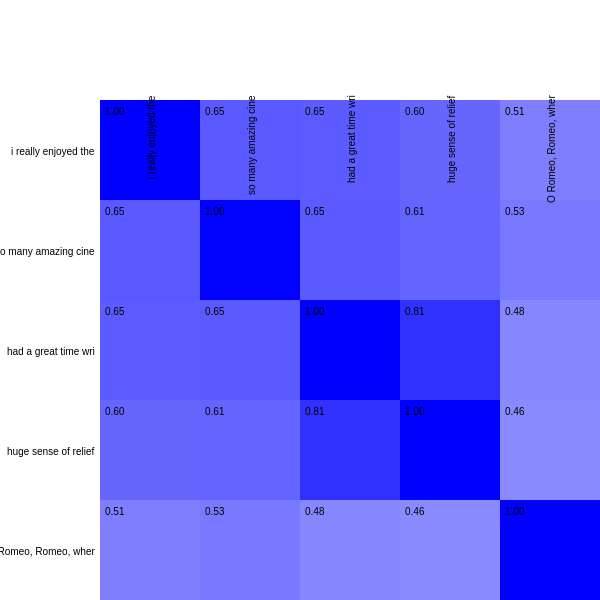

In [22]:
import { createCanvas } from "canvas";

const matrix: number[][] = cosineSimilarityArray(embeddings);
// eslint-disable-next-line @typescript-eslint/no-unsafe-member-access
const labels: string[] = df.text.values as string[];

const size = 600;
const padding = 100;
const cellSize = (size - padding) / matrix.length;

const canvas = createCanvas(size, size);
const ctx = canvas.getContext("2d");

function similarityToColor(value: number) {
  const intensity = Math.floor(255 * value);
  return `rgb(${255 - intensity}, ${255 - intensity}, 255)`; // light to dark blue
}

for (let y = 0; y < matrix.length; y++) {
  for (let x = 0; x < matrix.length; x++) {
    const sim = matrix[y][x];
    ctx.fillStyle = similarityToColor(sim);
    ctx.fillRect(padding + x * cellSize, padding + y * cellSize, cellSize, cellSize);
    ctx.fillStyle = "black";
    ctx.font = "10px Arial";
    ctx.fillText(sim.toFixed(2), padding + x * cellSize + 5, padding + y * cellSize + 15);
  }
}

ctx.font = "10px Arial";
ctx.fillStyle = "black";
ctx.textAlign = "right";

labels.forEach((label, i) => {
  ctx.save();
  ctx.translate(padding - 5, padding + i * cellSize + cellSize / 2);
  ctx.fillText(label.slice(0, 20), 0, 5);
  ctx.restore();
});

labels.forEach((label, i) => {
  ctx.save();
  ctx.translate(padding + i * cellSize + cellSize / 2, padding - 5);
  ctx.rotate(-Math.PI / 2);
  ctx.textAlign = "right";
  ctx.fillText(label.slice(0, 20), 0, 5);
  ctx.restore();
});

tslab.display.html(`<img src="${canvas.toDataURL()}" alt="Cosine Similarity Matrix">`);


## Next Steps

### Do more with Gemini

If you want to use more of the Gemini capabilities and especially its unique capabilities not available through the OpenAI compatibility, you should check out the [Google GenAI SDK](https://github.com/googleapis/js-genai).

The Cookbook is full of examples on how to use it but it is recommended to start with the [Getting started](Get_started.ipynb) notebook to get a feel of all the models and SDK capabilities.

### Related examples

Check the rest of the Cookbook. You'll learn how to use the [Live API](Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](Spatial_understanding.ipynb) abilities.

Also check the [Thinking cookbook](Get_started_thinking.ipynb) that explicitly showcases its thoughts and can manage more complex reasonings.
